### Verify SV_deltas

Use the parameters estimated with the questplus (ADO) and calculate the SV_difference given the trials generated

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os,sys

In [43]:
#  'cdd_mean_alpha',
#  'cdd_mean_kappa',
#  'cdd_mean_gamma',
#  'cdd_sd_alpha',
#  'cdd_sd_kappa',
#  'cdd_sd_gamma',
#  'cdd_immed_amt_qp',
#  'cdd_delay_amt_qp',
#  'cdd_delay_wait_qp', 

def get_params(fn,task='cdd'):
    df = pd.read_csv(fn)
    if task == 'cdd':
        kappa = df['cdd_mean_kappa'].iloc[-1]
        gamma = df['cdd_mean_gamma'].iloc[-1]
        return kappa,gamma
    elif task== 'crdm':
        alpha = df['crdm_mean_alpha'].iloc[-1]
        beta = df['crdm_mean_beta'].iloc[-1]
        gamma = df['crdm_mean_gamma'].iloc[-1]
        return alpha,beta,gamma
    else: return 0 


def get_subj_fn_qp(subj_fn,task='cdd'):
    subj = os.path.basename(subj_fn).replace('_{}.csv'.format(task),'')
    subj_fn_qp = subj_fn.replace('split','split_qp').replace(subj,'{}_qp'.format(subj))
    if os.path.exists(subj_fn_qp):
        return subj_fn_qp,subj
    else: return 0,0

In [44]:
def append_SV_delta_cdd(subj_fn,kappa):
    df = pd.read_csv(subj_fn)
    df['SV_delay'] = df['cdd_delay_amt'] / (1+kappa*df['cdd_delay_wait'])
    df['SV_now'] = df['cdd_immed_amt']
    df['SV_delta'] = df['SV_delay'] - df['SV_now']
    return df

def append_SV_delta_crdm(subj_fn,alpha,beta):
    df = pd.read_csv(subj_fn)
    df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
    df['SV_lottery'] =  (df['crdm_lott_p'] - beta*df['crdm_amb_lev']/2.0)*df['crdm_lott_amt']**alpha
    df['SV_safe'] = df['crdm_sure_amt']**alpha
    df['SV_delta'] = df['SV_lottery'] - df['SV_safe']
    return df

KeyError: 'crdm_lott_amt'

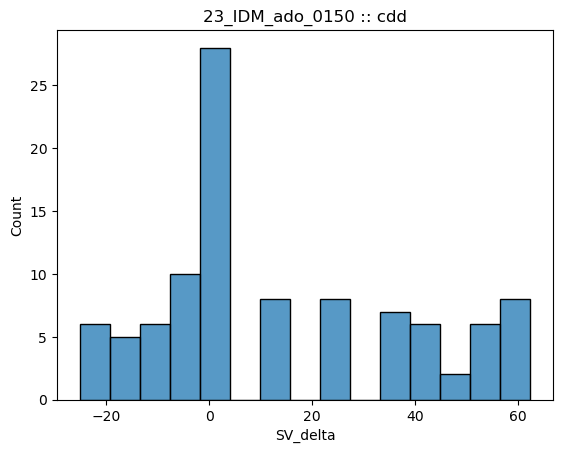

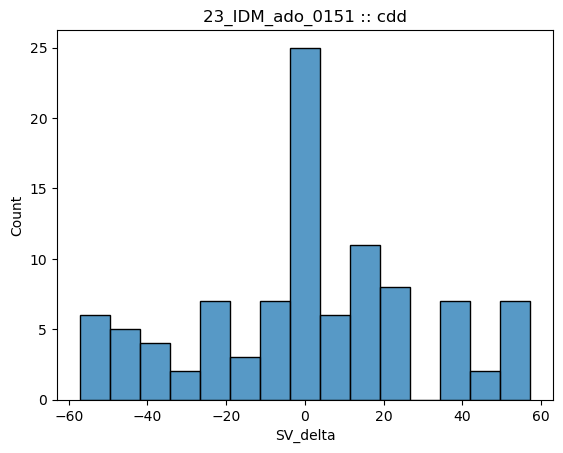

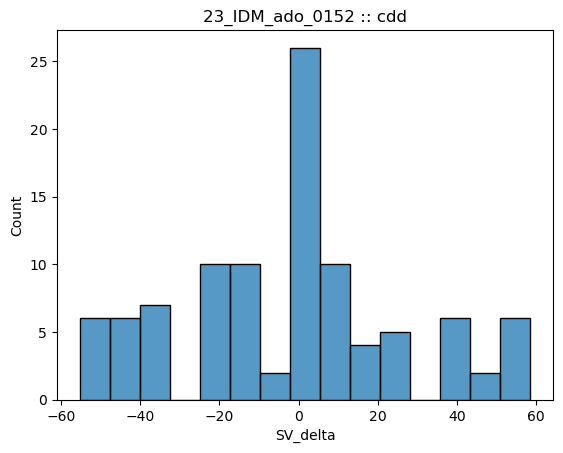

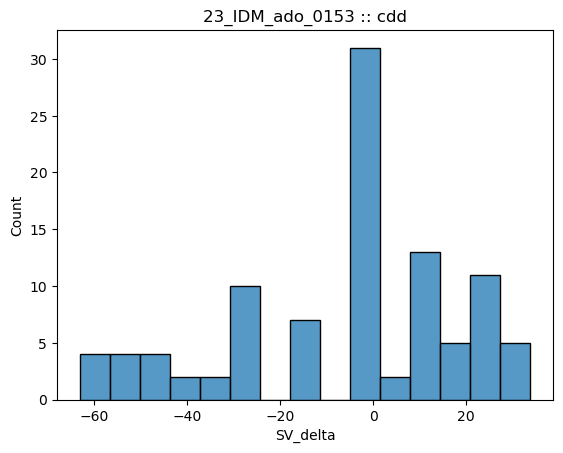

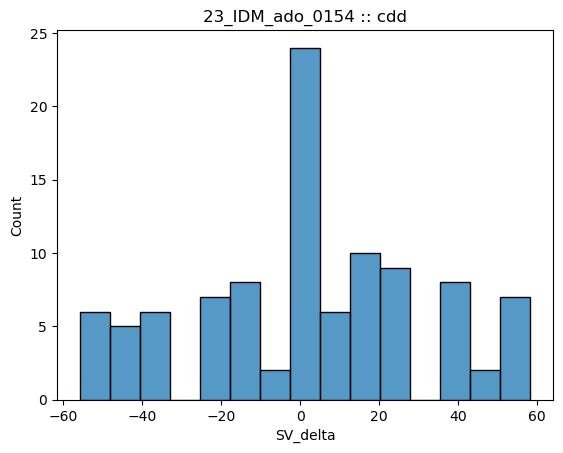

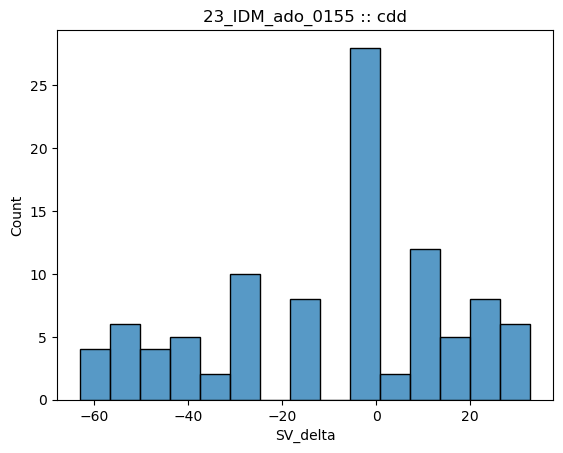

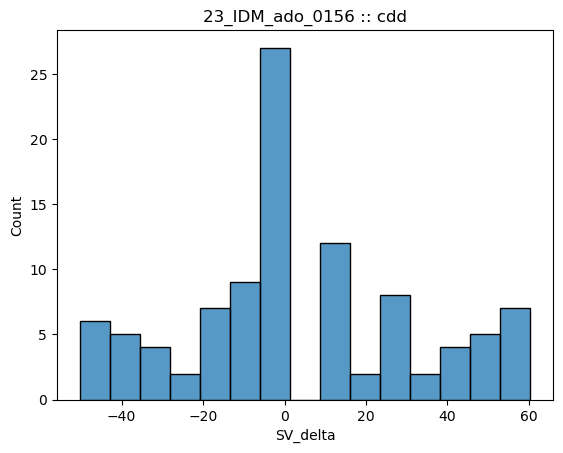

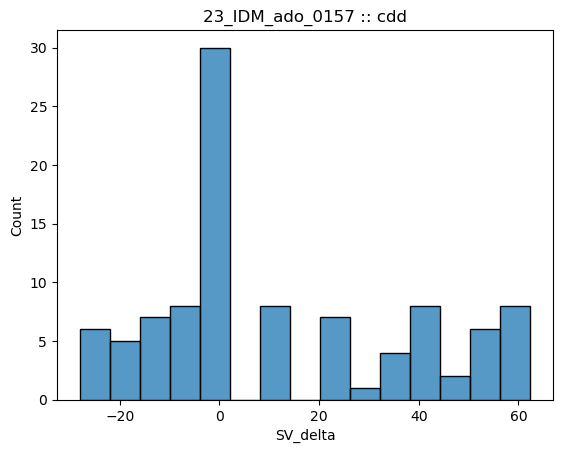

In [45]:
split_dir = '/Volumes/UCDN/datasets/IDM_ado/split/'
split_dir_qp = '/Volumes/UCDN/datasets/IDM_ado/split_qp/'
utility_dir = '/Volumes/UCDN/datasets/IDM_ado/utility/'

#get set of all good data files for analysis

task = 'cdd'
good_files = sorted(glob(os.path.join(split_dir, '*/{}/*.csv'.format(task))))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()
for i, subj_fn in enumerate(good_files):
    subj_fn_qp,subj = get_subj_fn_qp(subj_fn,task=task)
    kappa,gamma = get_params(subj_fn_qp,task=task)
    df = append_SV_delta_cdd(subj_fn,kappa)
    plt.figure(i)
    sns.histplot(data=df, x='SV_delta',bins=15)
    plt.title('{} :: {}'.format(subj,task))



task = 'crdm'
good_files = sorted(glob(os.path.join(split_dir, '*/{}/*.csv'.format(task))))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()
for i, subj_fn in enumerate(good_files):
    subj_fn_qp,subj = get_subj_fn_qp(subj_fn,task=task)
    alpha,beta,gamma = get_params(subj_fn_qp,task=task)
    df = append_SV_delta_crdm(subj_fn,alpha,beta)
    plt.figure(i)
    sns.histplot(data=df, x='SV_delta',bins=15)
    plt.title('{} :: {}'.format(subj,task))
